#Cancer de Mama

## Carregar base de Dados

In [ ]:
# Importação dos pacotes
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

# Seed para reprodução de resultados
seed = 10
random.seed(seed)
np.random.seed(seed)

In [ ]:
data = pd.read_csv('breastCancer.csv', index_col=0)  # idx da coluna a ser usado como nome de linha
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
data.shape

(569, 31)

In [ ]:
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


## Separar base em treino e teste

In [ ]:
from sklearn.model_selection import train_test_split 
# Agora usaremos a função para fazer de fato a separação. Já faremos a separação em treino e teste e entrada e saída.
X = data.loc[:,data.columns != 'diagnosis']  # Entrada
y = data.diagnosis    # Saída
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [ ]:
y.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [ ]:
# Verificar proporção para teste para confirmar amostragem estratificada
print(0.2*data.diagnosis.value_counts()[0])
print(0.2*data.diagnosis.value_counts()[1])

71.4
42.400000000000006


In [ ]:
y_test.value_counts()

B    72
M    42
Name: diagnosis, dtype: int64

In [ ]:
y_train.value_counts()

B    285
M    170
Name: diagnosis, dtype: int64

In [ ]:
# Vamos olhar os shapes da bases de treino e teste
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(455, 30)
(114, 30)
(455,)
(114,)


##Machine Learning

In [ ]:
# treinar modelo
from sklearn.linear_model import LogisticRegression

def train(X_train, y_train):
  model = LogisticRegression()
  model.fit(X_train, y_train);
  y_pred = model.predict(X_test) #inferência do teste

  return model, y_pred

model, y_pred = train(X_train, y_train)

### Avaliar modelo treinado na base de teste

Acurácia:  0.9298245614035088
Kappa:  0.8461538461538461
F1:  0.9290184921763869


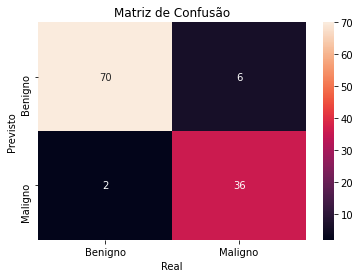

In [ ]:
def evaluate(y_test, y_pred):  

  # Acurácia
  from sklearn.metrics import accuracy_score
  accuracy = accuracy_score(y_test, y_pred)
  print('Acurácia: ', accuracy)

  # Kappa
  from sklearn.metrics import cohen_kappa_score
  kappa = cohen_kappa_score(y_test, y_pred)
  print('Kappa: ', kappa)

  # F1
  from sklearn.metrics import f1_score
  f1 = f1_score(y_test, y_pred, average='weighted')
  print('F1: ', f1)

  # Matriz de confusão
  from sklearn.metrics import confusion_matrix
  confMatrix = confusion_matrix(y_pred, y_test)

  ax = plt.subplot()
  sns.heatmap(confMatrix, annot=True, fmt=".0f")
  plt.xlabel('Real')
  plt.ylabel('Previsto')
  plt.title('Matriz de Confusão')

  # Colocar os nomes
  ax.xaxis.set_ticklabels(['Benigno', 'Maligno']) 
  ax.yaxis.set_ticklabels(['Benigno', 'Maligno'])
  plt.show()

evaluate(y_test, y_pred)

###Normalizar

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Acurácia:  0.9736842105263158
Kappa:  0.9431704885343968
F1:  0.9736164257756981


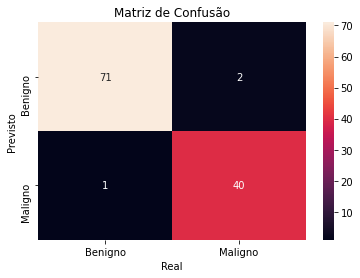

In [ ]:
# Treinar e Testar novamente
model, y_pred = train(X_train, y_train)
evaluate(y_test, y_pred)

##Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Parâmetros a serem testados
tuned_parameters = [{'C': [0.1, 1.0, 10]}]

print("# Tuning hyper-parâmetros parar F1 score")
print()

model = GridSearchCV(LogisticRegression(), tuned_parameters, scoring='f1_weighted')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print()

# Tuning hyper-parâmetros parar F1 score

              precision    recall  f1-score   support

           B       0.96      0.99      0.97        72
           M       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114




In [ ]:
model.best_estimator_

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=2000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Acurácia:  0.9649122807017544
Kappa:  0.9238476953907816
F1:  0.9647247085304307


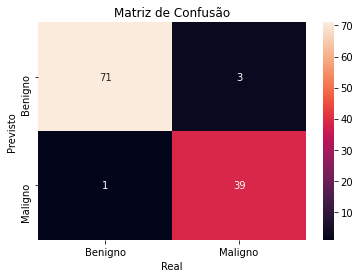

In [ ]:
evaluate(y_test, y_pred)

In [ ]:
probabilities = model.predict_proba(X_test)
probabilities

array([[1.80230991e-02, 9.81976901e-01],
       [6.32847444e-01, 3.67152556e-01],
       [3.88160569e-01, 6.11839431e-01],
       [9.97533271e-02, 9.00246673e-01],
       [9.70827785e-01, 2.91722150e-02],
       [8.85613752e-01, 1.14386248e-01],
       [9.97123882e-01, 2.87611820e-03],
       [8.20556032e-03, 9.91794440e-01],
       [9.62531891e-01, 3.74681095e-02],
       [1.13136022e-04, 9.99886864e-01],
       [7.48309447e-01, 2.51690553e-01],
       [1.29217829e-01, 8.70782171e-01],
       [9.93319603e-01, 6.68039696e-03],
       [9.95297791e-01, 4.70220911e-03],
       [9.93075632e-01, 6.92436798e-03],
       [2.26814128e-02, 9.77318587e-01],
       [9.24951931e-01, 7.50480688e-02],
       [9.31846964e-01, 6.81530363e-02],
       [9.84705050e-01, 1.52949495e-02],
       [9.56004951e-01, 4.39950493e-02],
       [2.61811517e-01, 7.38188483e-01],
       [2.95910156e-04, 9.99704090e-01],
       [9.96123922e-01, 3.87607794e-03],
       [1.08637361e-01, 8.91362639e-01],
       [9.983938

##Pós processamento: vou ser mais conservadora olhando para as probabilidades
Se o modelo não me der 80% de certeza que se trata de um tumor benigno, eu classifico como maligno.

In [ ]:
y_pred = []
count = 0
for prediction in probabilities:
  if prediction[0] > prediction[1] and prediction[0] < 0.8:
    count += 1
  if prediction[0] < 0.8:
    y_pred.append('M')
  else:
    y_pred.append('B')

count

5

Acurácia:  0.9736842105263158
Kappa:  0.9442815249266863
F1:  0.9738579758273159


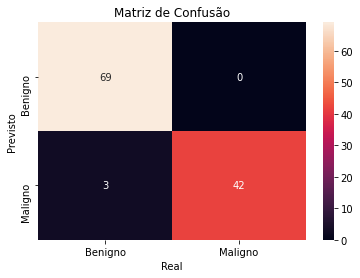

In [ ]:
evaluate(y_test, y_pred)